# Segment and Convert  biosignals
Segment : cut the different acquisitions recorded in the same file (multi-run recordings).

Convert : change the file type (from `.acq` to `.tsv.gz`).


#### Dependencies

In [3]:
import pandas as pd
import numpy as np
import os

In [2]:
import neurokit2 as nk2
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%pylab inline
sns.set_style('darkgrid')
pylab.rcParams['figure.figsize'] = (12.0, 6.0)  
plt.rcParams.update({'font.size': 14})

Populating the interactive namespace from numpy and matplotlib


#### import some code

In [10]:
%run /home/francois.lespinasse/cneuromod/ds_prep/physio/code/conversion/test/convert_seg2hdf.py

In [16]:
batch_processing('/home/francois.lespinasse/physiological-signals/tests/conversion/', sub='sub-06')

sub-06
ses-004
ses-009
ses-003
ses-010
ses-007
.ipynb_checkpoints
ses-002
ses-008
ses-005
ses-001
ses-006


In [9]:
%run code/utils/get_info.py -h

ERROR:root:File `'code/utils/get_info.py'` not found.


# Segmentation and Conversion



## `phys2bids` workflow
``phys2bids -in <input-file.acq> -chtrig <always-the-same-#> -ntp ### ### ### -tr 1.49 -outdir <root-bids-dir> -heur <path/to/heur.py>``

``-ntp`` : number of trigger timepoints listed by runs without brackets


In [27]:
ls = list_sub('/data/neuromod/DATA/cneuromod/movie10/sourcedata/physio', sub='sub-02', show=True)

list of files for session ses-010: ['neuromod_video52019-07-03T13_27_12.acq']
list of files for session ses-009: ['neuromod_video52019-06-07T14_25_10.acq']
list of files for session ses-003: ['sub-03_ses-video5-003.acq']
list of files for session ses-004: ['sub-02_ses-bourne_supremacy1.acq']
list of files for session ses-007: ['neuromod_video52019-05-31T13_37_44.acq']
list of files for session ses-005: ['fast sampling rate data2019-05-03T10_21_52.acq']
list of files for session ses-002: ['ses-video5-002.acq']
list of files for session ses-008: ['neuromod_video52019-06-04T13_06_24.acq']
list of files for session ses-011: ['neuromod_video52019-07-10T13_58_39.acq']
list of files for session ses-006: ['neuromod_video52019-05-28T09_07_51.acq']
list of files for session ses-001: ['sub-02_ses-life1.acq']
list of files for session ses-012: ['p02_video012_2019-07-11T16_05_00.acq']


++#### NOTE : have to keep sub in dataframe so i can group

In [ ]:
metadata = pd.DataFrame()
tmp = pd.read_json(f'/home/francois.lespinasse/physiological-signals/tests/conversion/sub-06/sub-06_volumes_all-ses-runs.json')
for ses in tmp:
    dict_new = tmp[ses]
    metadata = metadata.append(dict_new, ignore_index=True)
    
metadata_whole = pd.DataFrame()
for sub in os.listdir('/home/francois.lespinasse/physiological-signals/tests/conversion/'):
    
    tmp = pd.read_json(f'/home/francois.lespinasse/physiological-signals/tests/conversion/{sub}/{sub}_volumes_all-ses-runs.json')
    
    for ses in tmp:
        dict_new = tmp[ses]
        metadata_whole = metadata_whole.append(dict_new, ignore_index=True)

### Number of volumes acquired per run for each sessions | sub-06

In [ ]:
metadata

##### See where there are missing runs for all phys data acquired

In [ ]:
mismatch = list(np.where(np.array(metadata_whole['expect_runs']-metadata_whole['processed_runs'])>0)[0]
)

In [ ]:
print(metadata_whole['in_file'][mismatch[0:-1]])

In [12]:
sessions = ['ses-010', 'ses-009', 'ses-003', 'ses-004', 'ses-007', 'ses-005', 'ses-002', 'ses-008', 'ses-011', 'ses-006', 'ses-001', 'ses-012']

In [13]:
sessions.sort()

In [14]:
sessions

['ses-001',
 'ses-002',
 'ses-003',
 'ses-004',
 'ses-005',
 'ses-006',
 'ses-007',
 'ses-008',
 'ses-009',
 'ses-010',
 'ses-011',
 'ses-012']

### homebrewed method

sub-06_ses-002_task-run01 in file  neuromod_video52019-08-20T14_52_12.acq 
in experiment: ses-002 is parsed.  and saved at /home/francois.lespinasse/physiological-signals/tests/conversion/ | sampling rate is : 10000.0 
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
sub-06_ses-002_task-run02 in file  neuromod_video52019-08-20T14_52_12.acq 
in experiment: ses-002 is parsed.  and saved at /home/francois.lespinasse/physiological-signals/tests/conversion/ | sampling rate is : 10000.0 
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
sub-06_ses-002_task-run03 in file  neuromod_video52019-08-20T14_52_12.acq 
in experiment: ses-002 is parsed.  and saved at /home/francois.lespinasse/physiological-signals/tests/conversion/ | sampling rate is : 10000.0 
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
~
sub-06_ses-002_task-run04 in file  neuromod_video52019-08-20T14_52_12.acq 
in experiment: ses-002 is parsed.  and saved at /home/francois.lespinasse/physiological-

{'ses-002': ['neuromod_video52019-08-20T14_52_12.acq']}

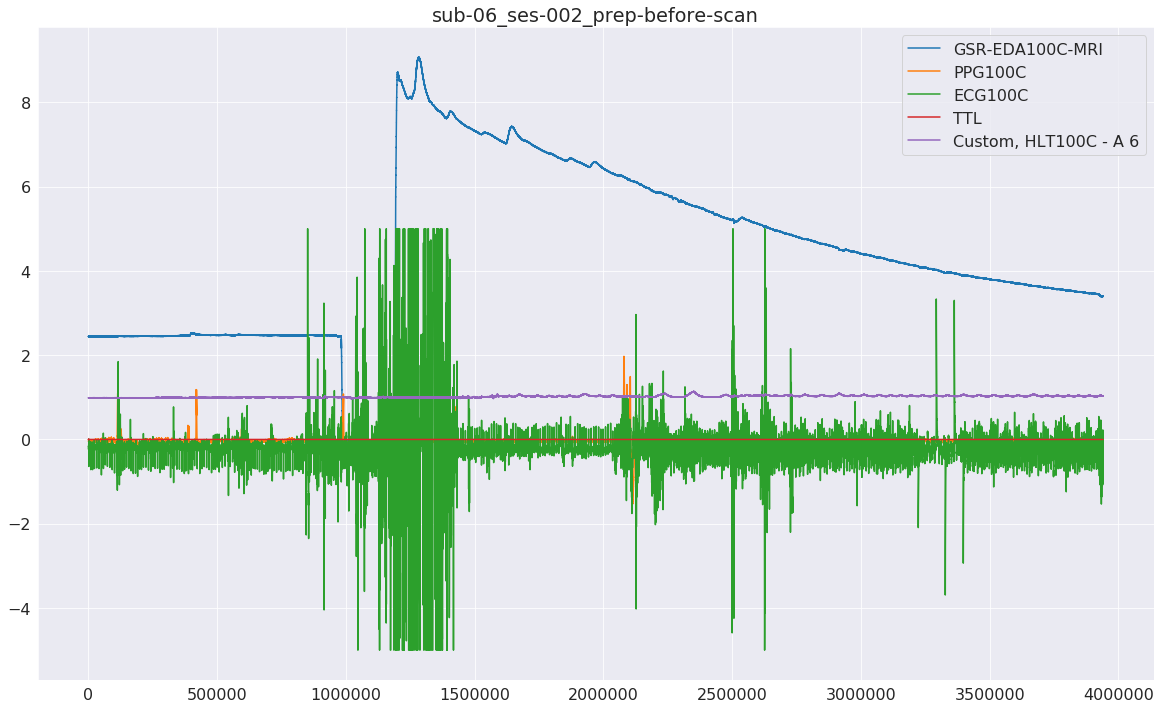

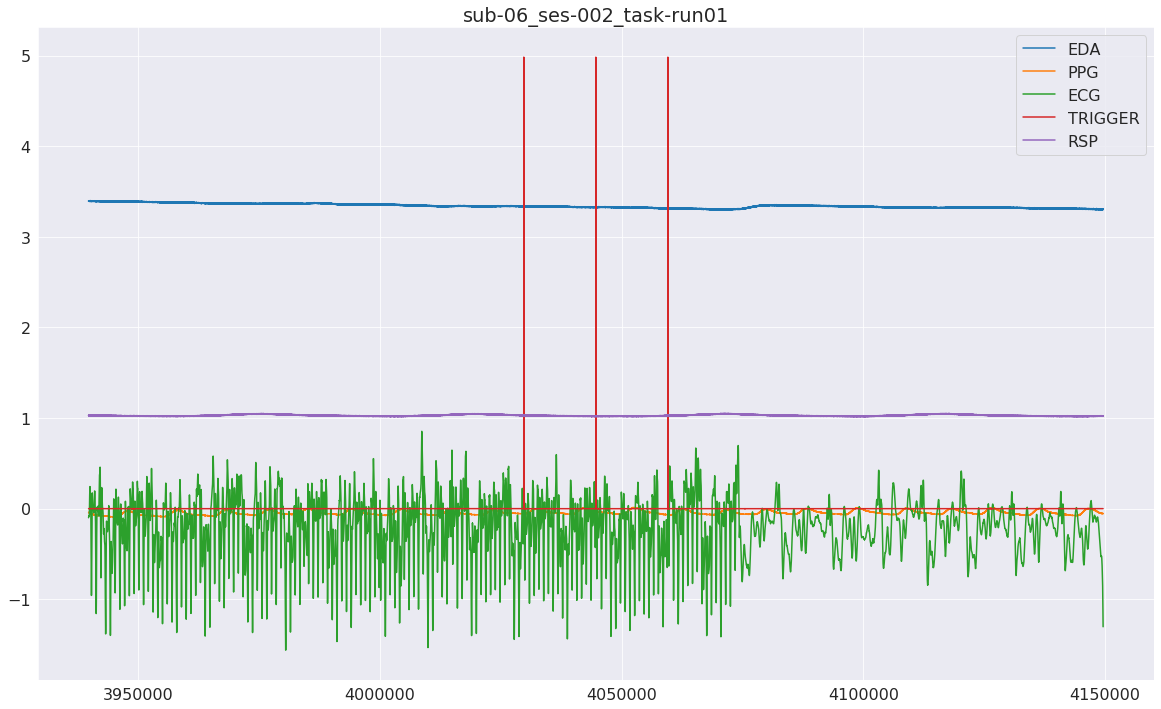

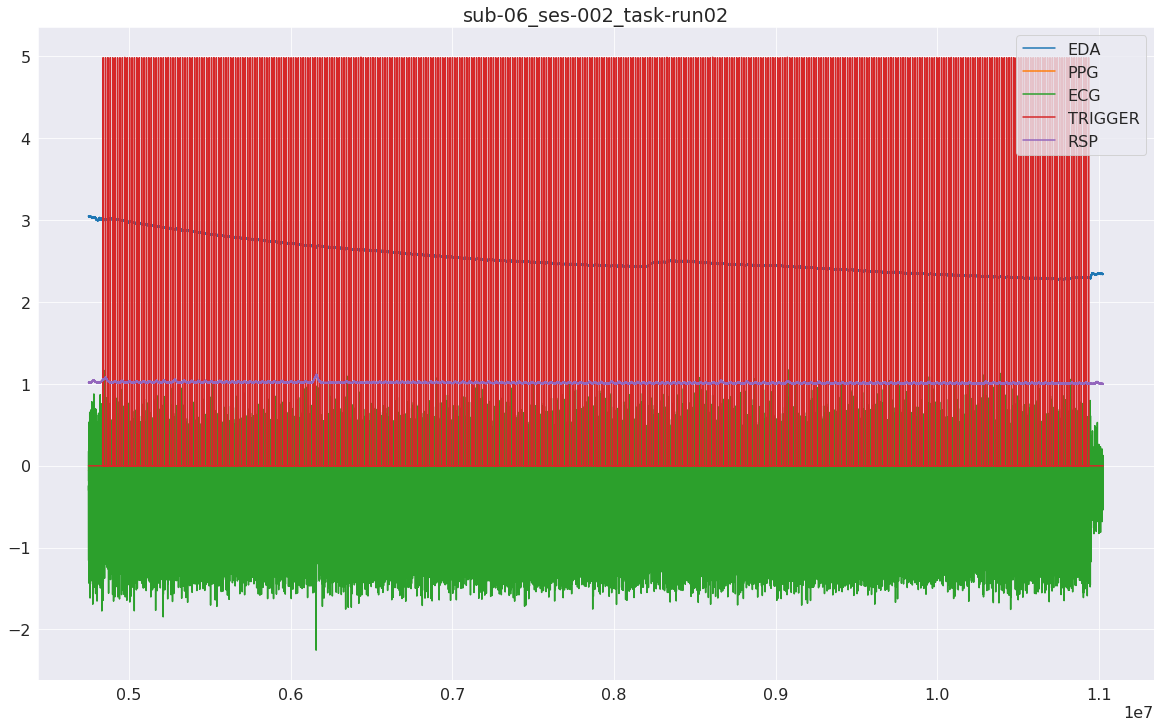

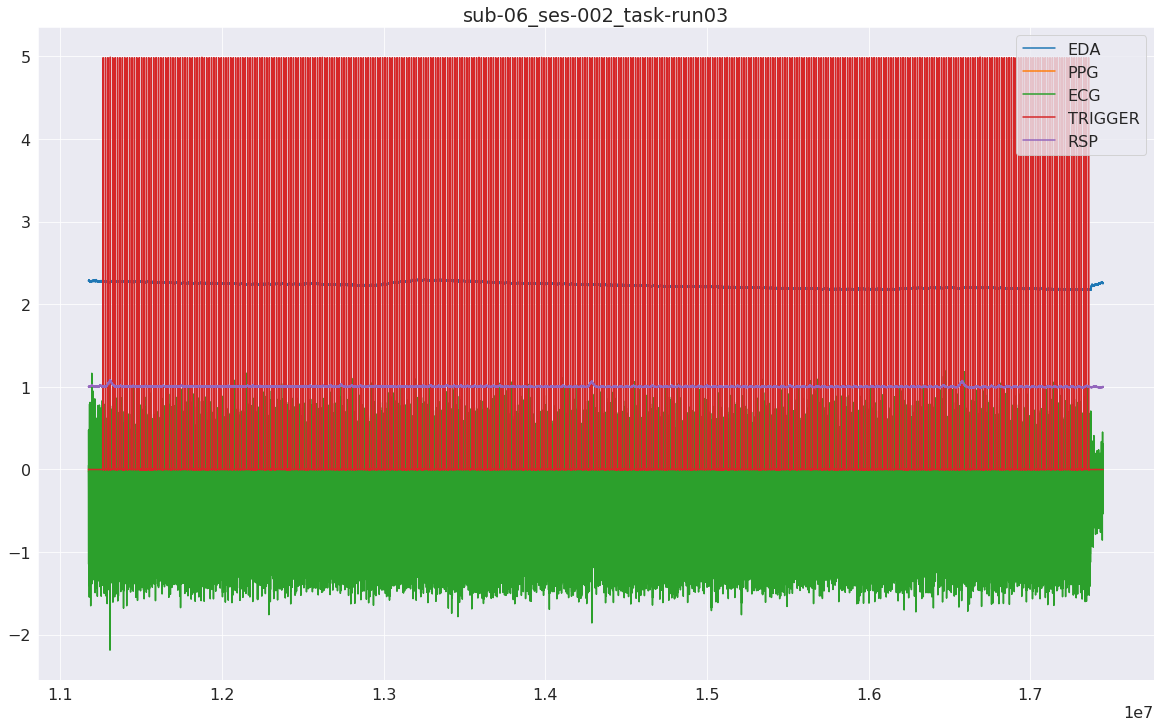

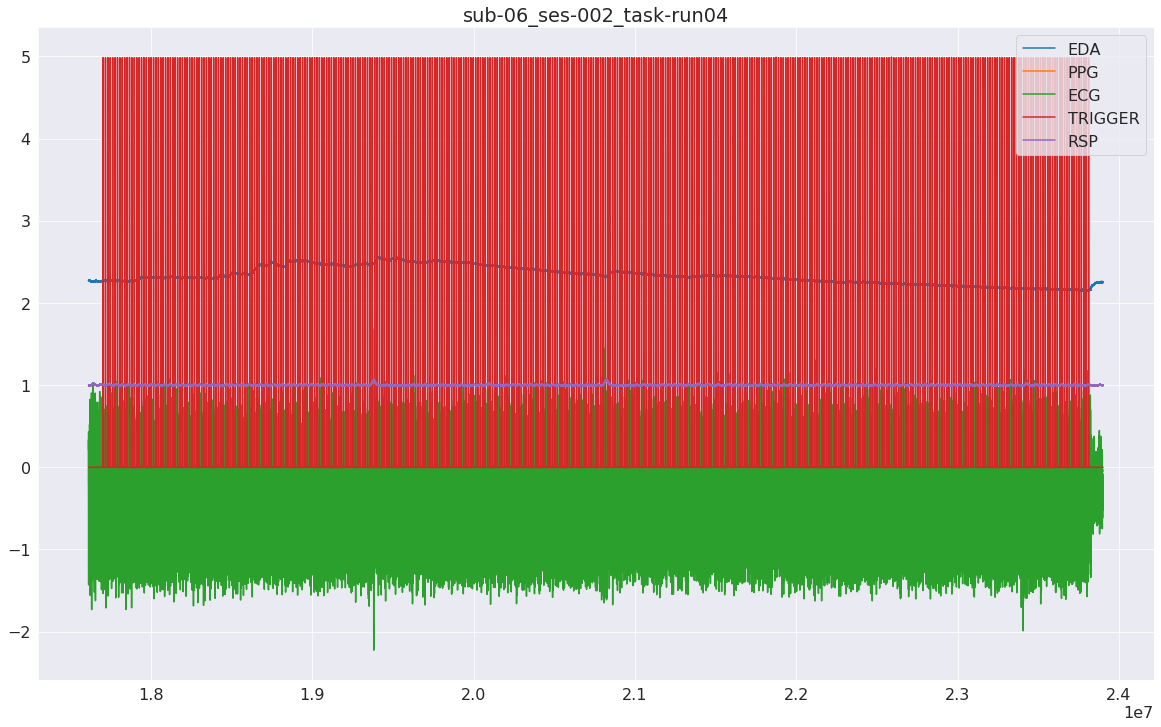

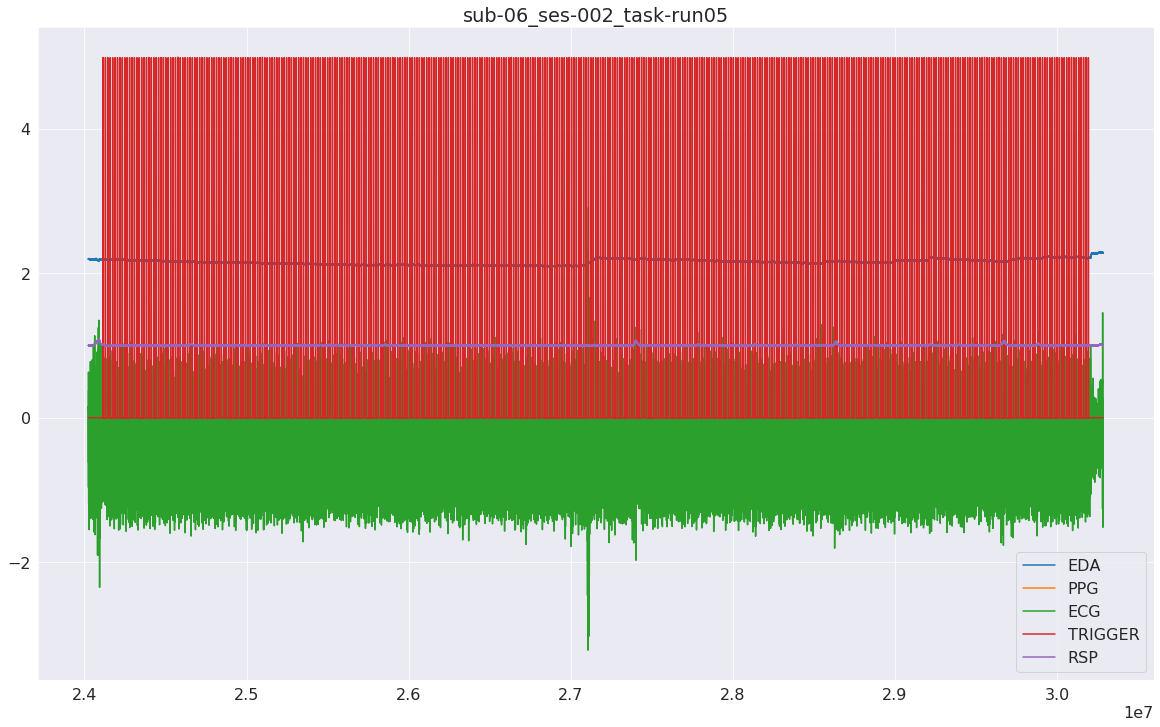

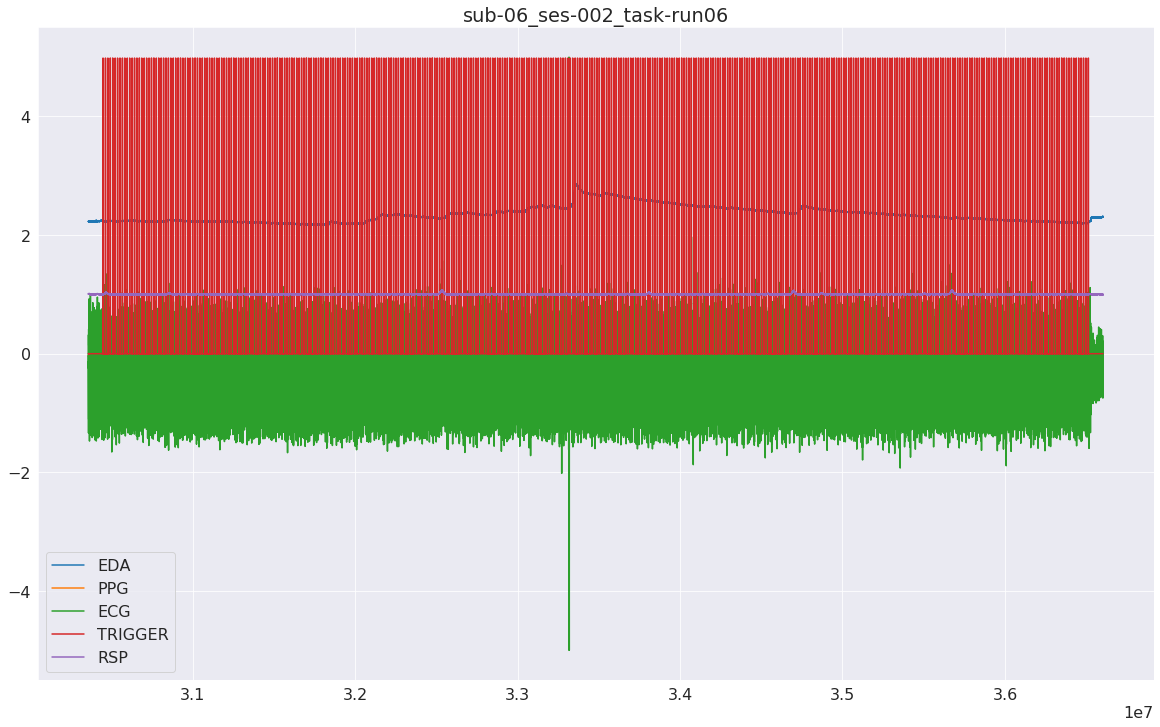

In [5]:
batch_parse(root='/data/neuromod/DATA/cneuromod/movie10/sourcedata/physio', subject='sub-06', ses='ses-002', save_path='/home/francois.lespinasse/physiological-signals/tests/conversion/')

In [4]:
info_dict = {}
for i in range(1,7):
    info = pd.read_csv(f'/home/francois.lespinasse/git/movie10_phys-ds_prep/reports/sub-0{i}_corrupted.csv', index_col='Unnamed: 0')
    info_dict[f'sub-0{i}'] = info

In [8]:
ppg = 0
rsp = 0
eda = 0
ses_count = 0
ses_sub = 0
for sub in info_dict.keys():
    print(sub)
    
    ses_sub = 0
    
    for ses in info_dict[sub].index:
        value = info_dict[sub].loc[ses]
        try:    
            ppg += int(value['ppg'])
            rsp += int(value['rsp'])
            eda += int(value['eda'])
        except ValueError:
            continue
        ses_count += 1
        ses_sub += 1
    print(ses_sub)

sub-01
11
sub-02
12
sub-03
11
sub-04
12
sub-05
8
sub-06
10


In [10]:
rsp

37

In [110]:
ses_count

64